# Practical no 6

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Play Tennis Dataset

In [41]:
df = pd.read_csv("playtennis.csv")

In [42]:
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [43]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['Play Tennis']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [47]:
y_pred = gaussian.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

In [49]:
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.85
Precision: 0.85
Recall: 0.85
Confusion Matrix:
[[ 51  14]
 [ 15 120]]


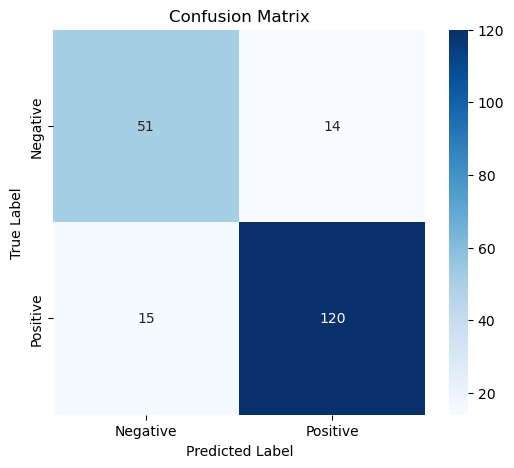

In [50]:

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [58]:
print("\nEnter new data for prediction:")
user_input = {}
for feature in ['Outlook', 'Temperature', 'Humidity', 'Wind']:
    value = input(f"Enter {feature}: ")
    user_input[feature] = label_encoders[feature].transform([value])[0]


Enter new data for prediction:


Enter Outlook:  Rain
Enter Temperature:  Cool
Enter Humidity:  Normal
Enter Wind:  Weak


In [60]:
# Convert input to DataFrame and scale
user_df = pd.DataFrame([user_input])
user_df = scaler.transform(user_df)
# Predict and display result
prediction = gaussian.predict(user_df)
result = label_encoders['Play Tennis'].inverse_transform(prediction)[0]

print(f"Predicted outcome: {result}")

Predicted outcome: Yes


# Iris Dataset

In [67]:
df = pd.read_csv("Iris.csv")


In [69]:
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [71]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [73]:
X = df.drop('Species', axis=1)
y = df['Species']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [81]:
y_pred = model.predict(X_test)


In [83]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
cm = confusion_matrix(y_test, y_pred)

In [85]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


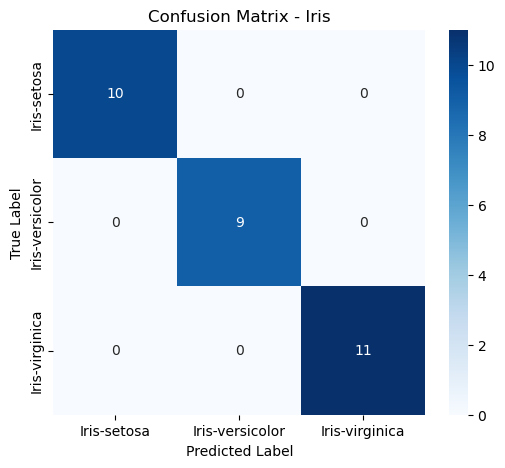

In [87]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Iris")
plt.show()


In [91]:
print("\nEnter new flower measurements for prediction:")
user_input = {}
for feature in X.columns:
    value = float(input(f"Enter {feature}: "))
    user_input[feature] = value



Enter new flower measurements for prediction:


Enter Id:  1
Enter SepalLengthCm:  5.1
Enter SepalWidthCm:  3.5
Enter PetalLengthCm:  1.4
Enter PetalWidthCm:  0.2


In [93]:
user_df = pd.DataFrame([user_input])
user_df = scaler.transform(user_df)

In [95]:
prediction = model.predict(user_df)
result = label_encoder.inverse_transform(prediction)[0]
print(f"Predicted Iris Species: {result}")

Predicted Iris Species: Iris-setosa
